<a href="https://colab.research.google.com/github/karlasophiacruz/artificial-intelligence-2021.1/blob/main/IA_Mission%C3%A1rios_e_Canibais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

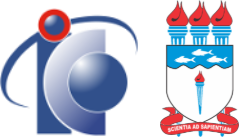

> **UNIVERSIDADE FEDERAL DE ALAGOAS - UFAL** <br />**INSTITUTO DE COMPUTAÇÃO - IC** <br />Engenharia de Computação <br />Nome: **Karla Sophia Santana da Cruz** <br />Matrícula: 19111113 <br />Período: 2021.1 <br />
###Inteligência Artificial - Aydano Machado 


# Problema dos Missionários e Canibais

Três canibais e três missionários estão viajando juntos e chegam à margem de um rio. Eles desejam atravessar para a outra margem para, desta forma, continuar a viagem. O único meio de transporte disponível é um barco que comporta no máximo duas pessoas. Há uma outra dificuldade: em nenhum momento o número de canibais pode ser superior ao número de missionários pois desta forma os missionários estariam em grande perigo de vida. Como administrar a travessia?

In [56]:
import pydot
from queue import Queue
import numpy as np

In [203]:
class Estado():

  movimentos = [[1, 0], [2, 0], [0, 1], [0, 2], [1, 1]]

  def __init__(self, estado, pai, acoes, nivel):
    #Quantidade de missionarios e cabinais e se o barco está no local de origem (1 = Sim, -1 = Não)
    self.estado = estado # estado[0] -> missionarios // estado[1] -> canibais // estado[2] -> barco
    self.pai = pai
    self.acoes = acoes
    self.nivel = nivel

  def str(self):
    return str(self.estado)
  
  def estado_final(self):
    if self.estado == [0, 0, -1]:
        return True
    return False
  
  def estado_valido(self):
    missionarios = self.estado[0]
    canibais = self.estado[1]
    barco = self.estado[2]

    if missionarios < 0 or missionarios > 3:
      return False
    if canibais < 0 or canibais > 3:
      return False
    if barco != -1 and barco != 1:
      return False
    return True
  
  def estado_morto(self):
    missionarios = self.estado[0]
    canibais = self.estado[1]
    if missionarios < canibais  and missionarios > 0:
      return True
    if (3 - missionarios) < (3 - canibais) and (3 - missionarios) > 0:
      return True

  def gerar_movimentos(self):
    movimento = []
    nivel = self.nivel + 1
    barco = (-1) * self.estado[2]

    for i in range(5):
      novo_estado = self.estado.copy()
      novo_estado[0] += barco * self.movimentos[i][0]
      novo_estado[1] += barco * self.movimentos[i][1]
      novo_estado[2] = barco
      acoes = [self.movimentos[i][0], self.movimentos[i][1]]
      estado = Estado(novo_estado, self, acoes, nivel)
      if self.movimentos[i][0] + self.movimentos[i][1] > 0 and self.movimentos[i][0] + self.movimentos[i][1] < 3:
         movimento.append(estado)
    return movimento
    
  def eh_solucao(self):
    solucao = []
    solucao.append(self.acoes)
    path = self
    while path.pai != None:      
      path = path.pai
      solucao.append(path.acoes)

    solucao = solucao[:-1]
    solucao.reverse()
    return solucao

  def printar_solucao(self):
    passos = []
    passo = "Todos os missionários e canibais foram transportados para o outro lado!"
    passos.append(passo)
    path = self
    while path.pai != None:
      if path.estado[2] == -1:
        passo = "[ " + (str(path.nivel) + "º viagem ] movendo " + str(path.acoes[0]) + " missionário(s) e " + str(path.acoes[1]) + " canibal(is) para o lado direito...")
      else:
        passo = "[ " + (str(path.nivel) + "º viagem ] movendo " + str(path.acoes[0]) + " missionário(s) e " + str(path.acoes[1]) + " canibal(is) para o lado esquerdo...")
      
      passos.append(passo)
      path = path.pai
    passos.reverse()
    return passos

In [205]:
def bfs(estado_inicial):
  raiz = Estado(estado_inicial, None, None, 0)
  
  if raiz.estado_final():
    return raiz.eh_solucao()
  
  q = Queue()
  q.put(raiz)
  visitados = []

  #print("A raiz é\nNivel = %d" % raiz.nivel)
  #print(str(raiz.estado))

  while not(q.empty()):
    no = q.get()

    #print("\nEstado Atual: \nNivel = " + str(no.nivel) + "\n" + str(no.estado) + "\n")

    visitados.append(no.estado)
    movimentos = no.gerar_movimentos()

    if not no.estado_morto():

      #print("Os movimentos possiveis para esse estado são", end = "")

      for movimento in movimentos:
        if movimento.estado_valido():
          if movimento.estado not in visitados:
            #print("\nNivel = %d" % movimento.nivel)
            #print(str(movimento.estado))

            if movimento.estado_final():
              #print("que é o nosso objetivo\n")
              return movimento.printar_solucao()

            else:
              q.put(movimento)
              visitados.append(movimento.estado)
  
  return


In [206]:
estado_inicial = [3, 3, 1]

solucao = bfs(estado_inicial)

for i in range(len(solucao)):
  print(solucao[i])



[ 1º viagem ] movendo 0 missionário(s) e 2 canibal(is) para o lado direito...
[ 2º viagem ] movendo 0 missionário(s) e 1 canibal(is) para o lado esquerdo...
[ 3º viagem ] movendo 0 missionário(s) e 2 canibal(is) para o lado direito...
[ 4º viagem ] movendo 0 missionário(s) e 1 canibal(is) para o lado esquerdo...
[ 5º viagem ] movendo 2 missionário(s) e 0 canibal(is) para o lado direito...
[ 6º viagem ] movendo 1 missionário(s) e 1 canibal(is) para o lado esquerdo...
[ 7º viagem ] movendo 2 missionário(s) e 0 canibal(is) para o lado direito...
[ 8º viagem ] movendo 0 missionário(s) e 1 canibal(is) para o lado esquerdo...
[ 9º viagem ] movendo 0 missionário(s) e 2 canibal(is) para o lado direito...
[ 10º viagem ] movendo 1 missionário(s) e 0 canibal(is) para o lado esquerdo...
[ 11º viagem ] movendo 1 missionário(s) e 1 canibal(is) para o lado direito...
Todos os missionários e canibais foram transportados para o outro lado!
